In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('supplier_data.csv')

# Display the first few rows of the dataset
df.head()

# Display summary statistics
df.describe()

# Display information about the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Fill or drop missing values as needed
df.fillna(method='ffill', inplace=True)  # Example: forward fill

# Convert data types if needed
df['Avg. Cost($)'] = df['Avg. Cost($)'].str.replace('k', '').astype(int) * 1000

Matplotlib is building the font cache; this may take a moment.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Supplier Name                 2000 non-null   object
 1   Region                        2000 non-null   object
 2   Country                       2000 non-null   object
 3   Function                      2000 non-null   object
 4   Service                       2000 non-null   object
 5   Avg. Cost($)                  2000 non-null   object
 6   Rating                        2000 non-null   int64 
 7   Average Delivery Time (days)  2000 non-null   int64 
 8   Number of Escalations         2000 non-null   int64 
 9   Year                          2000 non-null   int64 
 10  Resources                     2000 non-null   int64 
 11  Delivery Frequency            2000 non-null   object
 12  Lead Time (days)              2000 non-null   int64 
 13  Total Shipments   

/var/folders/2y/02wpygpx0nndjw00s8t1x_100000gn/T/ipykernel_8210/640145183.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Example: forward fill


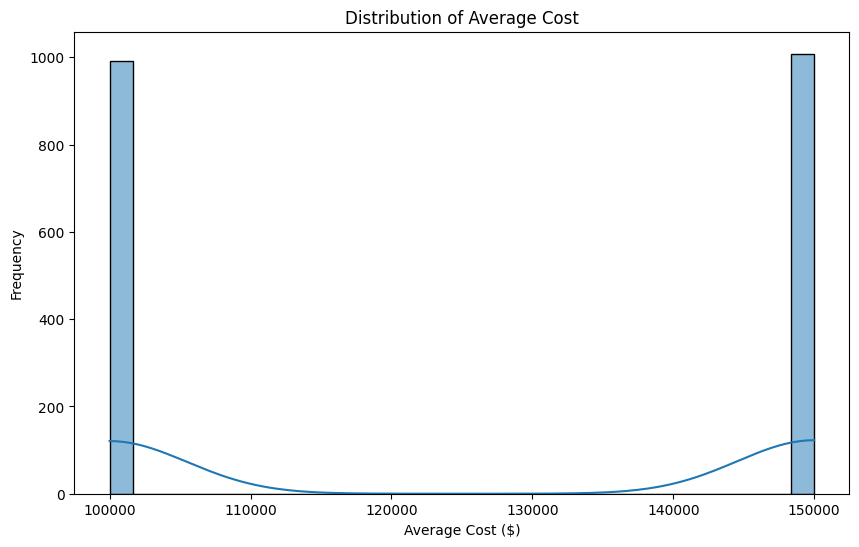

In [2]:
# Distribution of Average Cost
plt.figure(figsize=(10, 6))
sns.histplot(df['Avg. Cost($)'], bins=30, kde=True)
plt.title('Distribution of Average Cost')
plt.xlabel('Average Cost ($)')
plt.ylabel('Frequency')
plt.show()

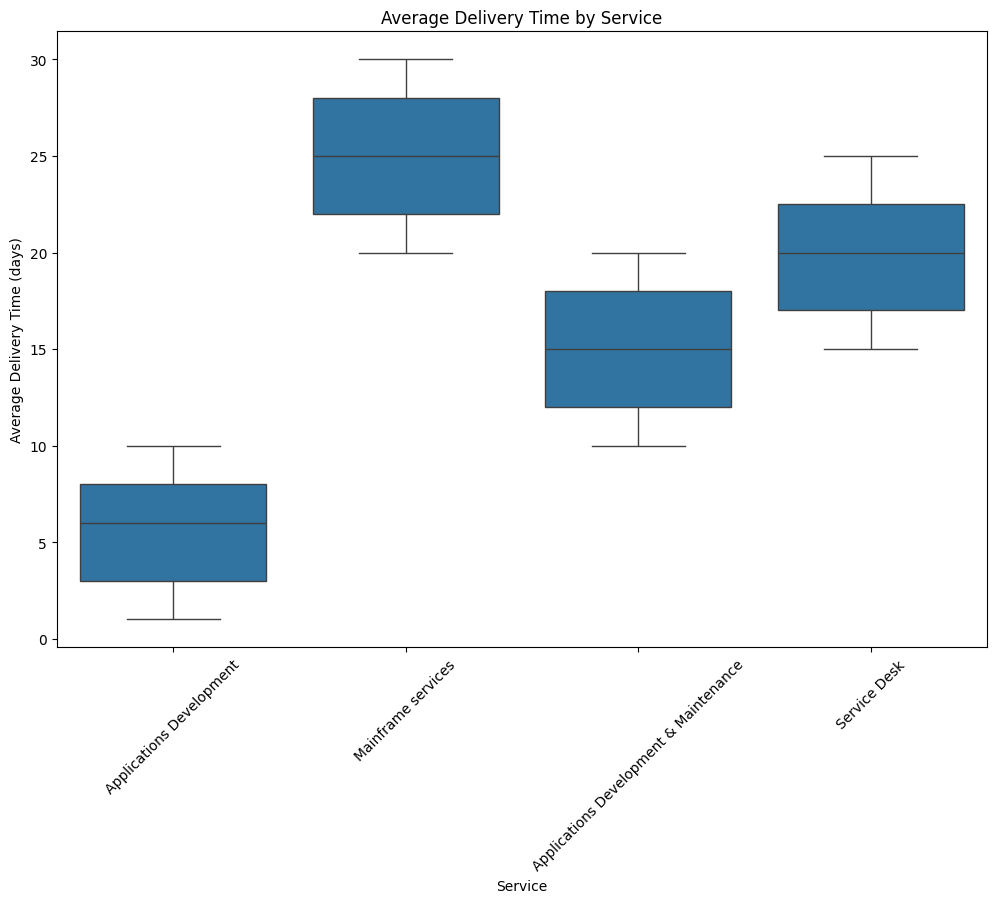

In [3]:
# Average Delivery Time by Service
plt.figure(figsize=(12, 8))
sns.boxplot(x='Service', y='Average Delivery Time (days)', data=df)
plt.title('Average Delivery Time by Service')
plt.xticks(rotation=45)
plt.show()

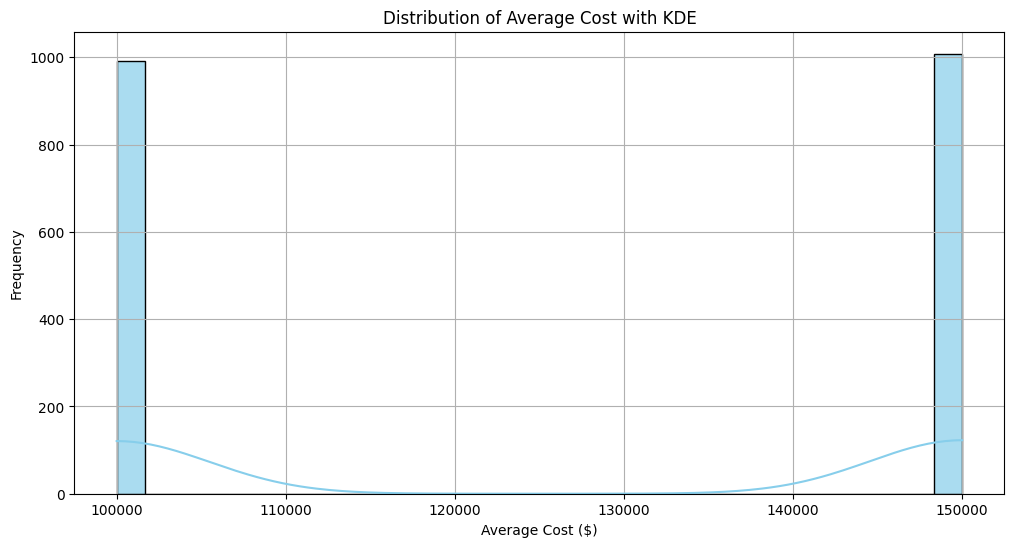

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Avg. Cost($)'], bins=30, kde=True, color='skyblue', alpha=0.7)
plt.title('Distribution of Average Cost with KDE')
plt.xlabel('Average Cost ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/var/folders/2y/02wpygpx0nndjw00s8t1x_100000gn/T/ipykernel_8210/2941257025.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Service', y='Average Delivery Time (days)', data=df, palette='coolwarm')
/Users/shrutigupta/Desktop/SmileLogistics/turnUp/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 50.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/shrutigupta/Desktop/SmileLogistics/turnUp/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 42.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/shrutigupta/Desktop/SmileLogistics/turnUp/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 48.2% of

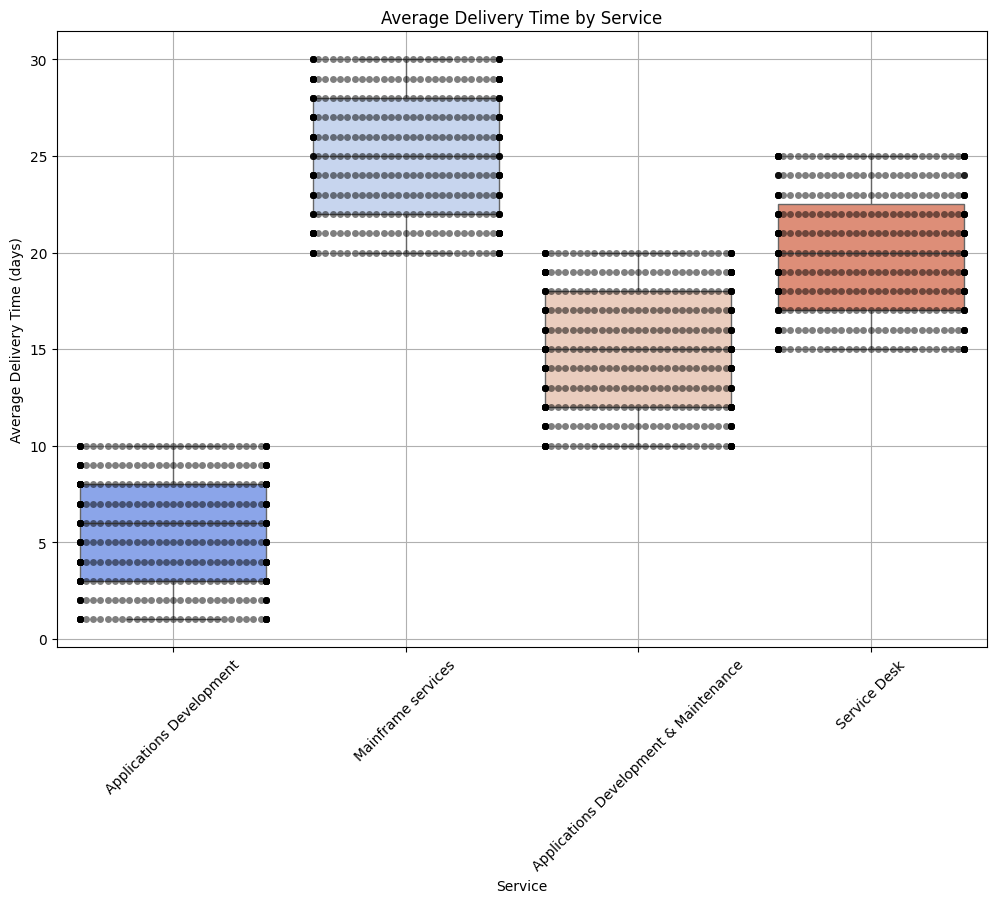

In [6]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Service', y='Average Delivery Time (days)', data=df, palette='coolwarm')
sns.swarmplot(x='Service', y='Average Delivery Time (days)', data=df, color='black', alpha=0.5)
plt.title('Average Delivery Time by Service')
plt.xticks(rotation=45)
plt.xlabel('Service')
plt.ylabel('Average Delivery Time (days)')
plt.grid(True)
plt.show()

/var/folders/2y/02wpygpx0nndjw00s8t1x_100000gn/T/ipykernel_8210/3777315254.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Service', y='Average Delivery Time (days)', data=df, palette='Set2')


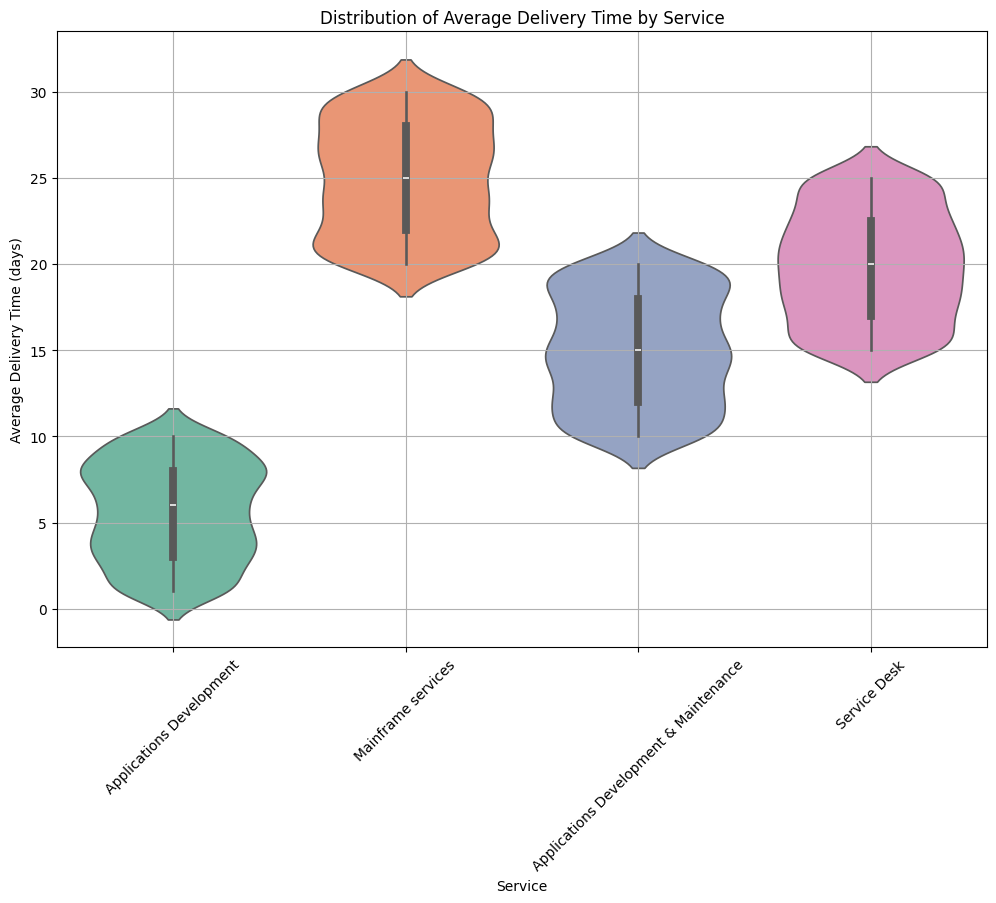

In [9]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Service', y='Average Delivery Time (days)', data=df, palette='Set2')
plt.title('Distribution of Average Delivery Time by Service')
plt.xticks(rotation=45)
plt.xlabel('Service')
plt.ylabel('Average Delivery Time (days)')
plt.grid(True)
plt.show()

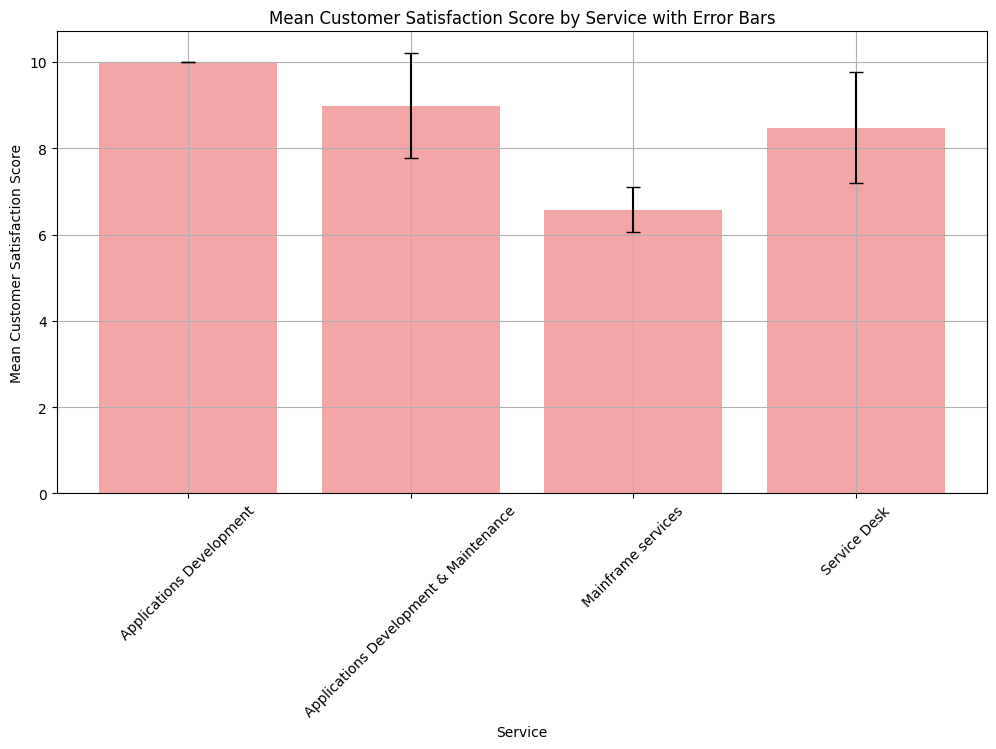

In [10]:
plt.figure(figsize=(12, 6))
mean_values = df.groupby('Service')['Customer Satisfaction Score'].mean()
std_values = df.groupby('Service')['Customer Satisfaction Score'].std()
plt.bar(mean_values.index, mean_values, yerr=std_values, capsize=5, color='lightcoral', ecolor='black', alpha=0.7)
plt.title('Mean Customer Satisfaction Score by Service with Error Bars')
plt.xlabel('Service')
plt.ylabel('Mean Customer Satisfaction Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

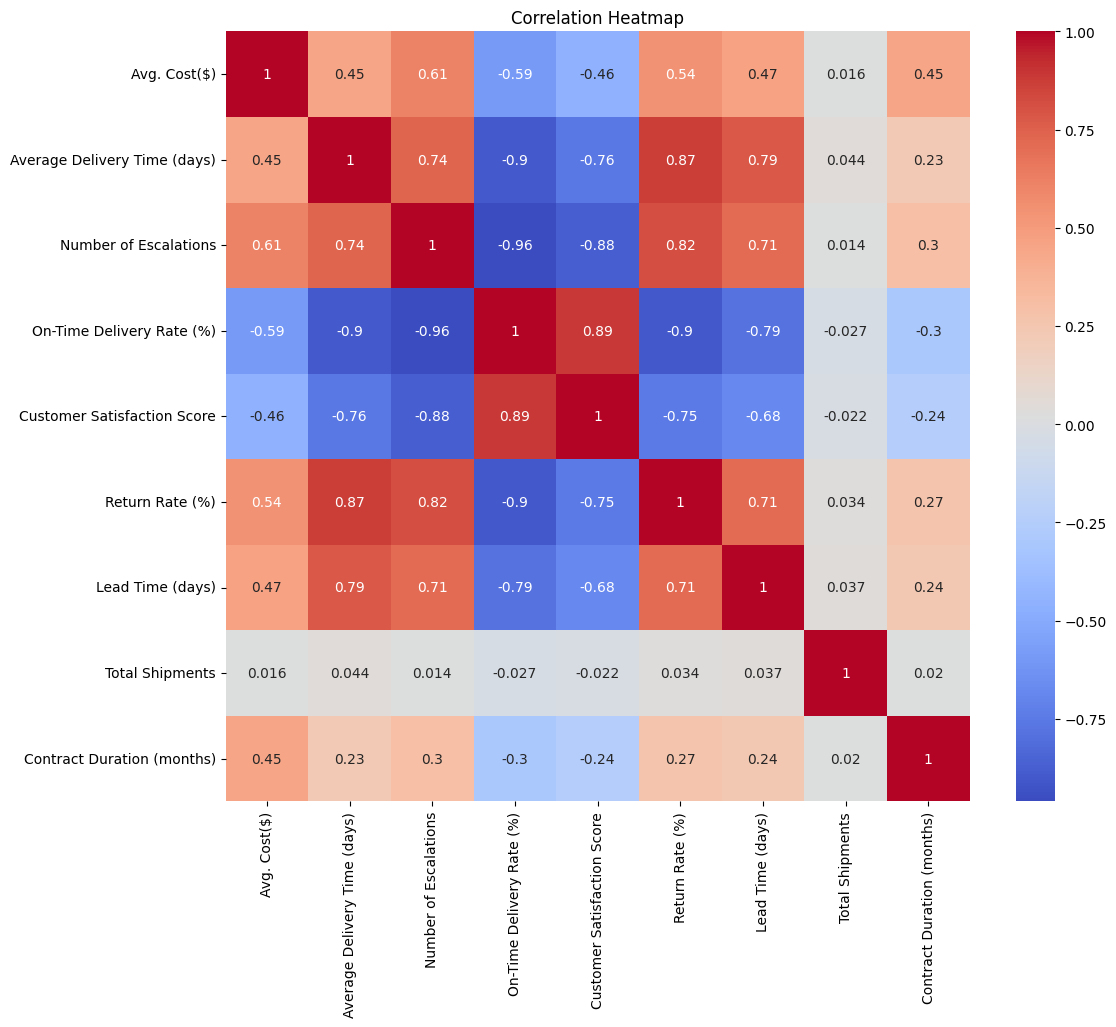

In [4]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[['Avg. Cost($)', 'Average Delivery Time (days)', 'Number of Escalations', 'On-Time Delivery Rate (%)', 'Customer Satisfaction Score', 'Return Rate (%)', 'Lead Time (days)', 'Total Shipments', 'Contract Duration (months)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()